In [3]:
# Parent directory import
import sys
sys.path.append('/home/rajkinra23/git/drip_vision/')


from pytorch_lightning import Trainer
from data.data_loaders import DeepFashionDatasetAdaptor, EfficientDetDataModule, TRAIN, VALIDATION
from models.efficient_det_model import EfficientDetModel

In [5]:
# Build the dataset interface
deepfashion_ds_train = DeepFashionDatasetAdaptor(TRAIN)
deepfashion_ds_validation = DeepFashionDatasetAdaptor(VALIDATION)
dm = EfficientDetDataModule(train_dataset_adaptor=deepfashion_ds_train, 
        validation_dataset_adaptor=deepfashion_ds_validation,
        num_workers=4,
        batch_size=8)

tensor([[129,  66, 313, 439],
        [111,  57, 336, 294]]) ['item', 'item'] (468, 833)


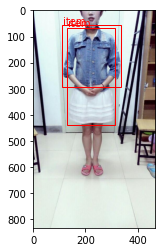

In [13]:
# Visualize
deepfashion_ds_train.show_image(100000)

In [2]:
# Build the model
model = EfficientDetModel(
    num_classes=1,
    img_size=512)

# Run training
trainer = Trainer(gpus=[0], max_epochs=10, num_sanity_val_steps=1)

# Train
trainer.fit(model, dm)

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


NameError: name 'dm' is not defined

In [15]:
# Load model from checkpoint
ckpt_file_path = 'efficientdet_checkpoints/epoch=9-step=239949.ckpt'
model = EfficientDetModel.load_from_checkpoint(ckpt_file_path)
model.eval()

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}

EfficientDetModel(
  (model): DetBenchTrain(
    (model): EfficientDet(
      (backbone): EfficientNetFeatures(
        (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (blocks): Sequential(
          (0): Sequential(
            (0): ConvBnAct(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNormAct2d(
                32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): SiLU(inplace=True)
              )
              (drop_path): Identity()
            )
            (1): ConvBnAct(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNormAct2d(
    

/home/rajkinra23/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/rajkinra23/.local/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/tmp/ipykernel_115296/519

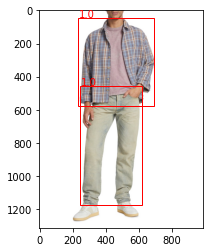

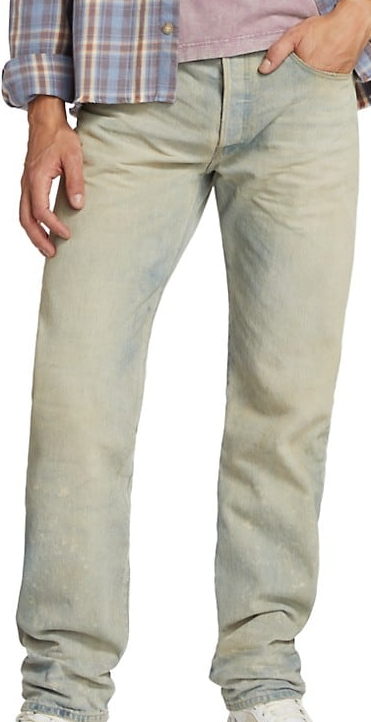

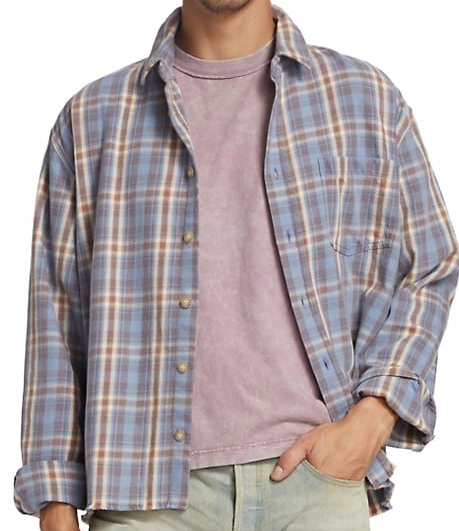

In [17]:
# Visualize some outputs
from detecto import visualize
import torch
from data.embeddings_dataset_dataloader import random_test_image
from PIL import Image

def visualize_prediction(image):
    boxes, labels, confidences = model.predict([image])
    boxes = torch.tensor(boxes[0])
    labels = labels[0]
    visualize.show_labeled_image(image, torch.tensor(boxes), labels)
    clothing_images = []
    for box in boxes:
        cropped_image = image.crop((int(val) for val in box))
        clothing_images.append(cropped_image)
        display(cropped_image)
    return clothing_images

for _ in range(1):
    # image = random_test_image()
    image = Image.open("/tmp/scraped_dataset/0400018389867/0400018389867_A1.jpg").convert("RGB")
    cropped_images = visualize_prediction(image)

In [1]:
from PIL import Image

img = Image.open("/tmp/scraped_dataset/0400018410995/0400018410995_A1.jpg").convert("RGB")
imgs = visualize_prediction(img)
print(imgs)

NameError: name 'visualize_prediction' is not defined